# ENEXIS Graduation Project

### prerequisite: install cbs odata library

In [2]:
pip install cbsodata

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cbsodata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbconvert
# pd.set_option("max_rows", 120)
pd.options.mode.chained_assignment = None  # default='warn'

Lets select a data set from CBS. One of the most comprehensive sets is "Kerncijfers wijken en buurten" which is actualized every year. It contains demographical data but also some data related to energy consumption, which can be linked to Enexis data via CBS area codes (Gemeente, Wijk and Buurt level). "Kerncijfers wijken en buurten 2019" is the most recent set containing largely complete data. In the sets of 2020 and 2021 many feature columns are yet empty.

In [4]:
a021 = '85039NED' #Kerncijfers wijken en buurten 2021
a020 = '84799NED' #Kerncijfers wijken en buurten 2020
a019 = '84583NED' #Kerncijfers wijken en buurten 2019
a018 = '84286NED' #Kerncijfers wijken en buurten 2018
a017 = '83765NED' #Kerncijfers wijken en buurten 2017
a016 = '83487NED' #Kerncijfers wijken en buurten 2016

a1 = '85126NED' #Energieverbruik woningen; wijkbuurt 2020
a2 = '85010NED' #Zonnestroom; wijken en buurten, 2019
a3 = '85080NED' #Woningen, hoofdverwarmingsinstallaties, gasinstallatie, cv warmtepomp, stadsverwarming, wijken en buurten 2020

In [5]:
selected_dataset = a020
dataset_new_format = False
if (selected_dataset == '85039NED') | (selected_dataset == '84799NED'):
    dataset_new_format = True

In [6]:
df_kerncijfers = pd.DataFrame(cbsodata.get_data(selected_dataset))

In [7]:
for name in df_kerncijfers.columns:
     print(name)

ID
WijkenEnBuurten
Gemeentenaam_1
SoortRegio_2
Codering_3
IndelingswijzigingWijkenEnBuurten_4
AantalInwoners_5
Mannen_6
Vrouwen_7
k_0Tot15Jaar_8
k_15Tot25Jaar_9
k_25Tot45Jaar_10
k_45Tot65Jaar_11
k_65JaarOfOuder_12
Ongehuwd_13
Gehuwd_14
Gescheiden_15
Verweduwd_16
WestersTotaal_17
NietWestersTotaal_18
Marokko_19
NederlandseAntillenEnAruba_20
Suriname_21
Turkije_22
OverigNietWesters_23
GeboorteTotaal_24
GeboorteRelatief_25
SterfteTotaal_26
SterfteRelatief_27
HuishoudensTotaal_28
Eenpersoonshuishoudens_29
HuishoudensZonderKinderen_30
HuishoudensMetKinderen_31
GemiddeldeHuishoudensgrootte_32
Bevolkingsdichtheid_33
Woningvoorraad_34
GemiddeldeWOZWaardeVanWoningen_35
PercentageEengezinswoning_36
PercentageMeergezinswoning_37
PercentageBewoond_38
PercentageOnbewoond_39
Koopwoningen_40
HuurwoningenTotaal_41
InBezitWoningcorporatie_42
InBezitOverigeVerhuurders_43
EigendomOnbekend_44
BouwjaarVoor2000_45
BouwjaarVanaf2000_46
GemiddeldElektriciteitsverbruikTotaal_47
Appartement_48
Tussenwoning_49
H

In [8]:
# for col in df_orig.columns:
#     print(col)

In [9]:
df_kerncijfers.head(5).transpose()

,0,1,2,3,4
ID,0,1,2,3,4
WijkenEnBuurten,Nederland,Aa en Hunze,Wijk 00 Annen,Annen,Verspreide huizen Annen
Gemeentenaam_1,Nederland,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
SoortRegio_2,Land,Gemeente,Wijk,Buurt,Buurt
Codering_3,NL00,GM1680,WK168000,BU16800000,BU16800009
...,...,...,...,...,...
OppervlakteWater_112,787228,279,13,0,13
MeestVoorkomendePostcode_113,.,.,.,9468,9468
Dekkingspercentage_114,NaN,NaN,NaN,1.0,1.0
MateVanStedelijkheid_115,2.0,5.0,5.0,5.0,5.0


In [10]:
#remove whitespaces from beginning and end of string column labels
df_kerncijfers = df_kerncijfers.apply(lambda x: x.str.strip() if x.dtype == "object" else x)   

Data on the level of Buurt are selected for EDA

In [11]:
df = df_kerncijfers[df_kerncijfers['SoortRegio_2'] == 'Buurt']

In [12]:
df['IndelingswijzigingWijkenEnBuurten_4'].value_counts() # just checking how many changes have been made since previous year

1    13038
3      636
2      134
Name: IndelingswijzigingWijkenEnBuurten_4, dtype: int64

Some rows have 0 values for "HuishoudensTotaal_28" feature. To use this feature for feature engineering, I need to eliminate 0 values, so I replace them with 1. 

In [13]:
df['HuishoudensTotaal_28'].replace({0 : 1}, inplace = True)

Changing Buurt codes into integers, so first remove "BU" letters at the beginning, and then changing the type into Int32

In [14]:
df['Codering_3'] = df['Codering_3'].map(lambda x: x.lstrip('BU'))

In [15]:
df['Codering_3'] = df['Codering_3'].astype(int)

In [16]:
df.head()

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_107,AfstandTotSchool_108,ScholenBinnen3Km_109,OppervlakteTotaal_110,OppervlakteLand_111,OppervlakteWater_112,MeestVoorkomendePostcode_113,Dekkingspercentage_114,MateVanStedelijkheid_115,Omgevingsadressendichtheid_116
3,3,Annen,Aa en Hunze,Buurt,16800000,1,3460,1685,1775,540,...,0.5,0.8,2.6,252,252,0,9468,1.0,5.0,411.0
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,16800009,1,155,80,80,15,...,1.7,2.0,1.2,1226,1213,13,9468,1.0,5.0,60.0
6,6,Eext,Aa en Hunze,Buurt,16800100,1,1255,640,615,185,...,1.2,0.9,1.0,171,170,1,9463,1.0,5.0,144.0
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,16800109,1,175,90,85,10,...,2.0,2.1,1.3,1618,1611,6,9463,1.0,5.0,36.0
9,9,Anloo,Aa en Hunze,Buurt,16800200,1,320,150,170,35,...,2.2,0.4,2.0,57,57,0,9467,1.0,5.0,126.0


In order to use in the EDA, numeric features have to be intensive variables i.e. such which do not depend on the size of the system. For this reason, two new variables are created by dividing the existing extensive variables `AantalInkomensontvangers_70` and `BedrijfsvestigingenTotaal_91` by number of inhabitants and number of households, respectively. Another new variable is defined to describe average education level, as a kind of weighted average of `OpleidingsniveauLaag_64`, `OpleidingsniveauMiddelbaar_65` and `OpleidingsniveauHoog_66`, with respective weights of 1, 2 and 3. The new variable assumes values in the range of 1 to 3.

In [17]:
df['Gemiddeld_opleidingsniveau'] = (df['OpleidingsniveauLaag_64'] * 1 + df['OpleidingsniveauMiddelbaar_65'] * 2 + 
                                df['OpleidingsniveauHoog_66'] * 3) / (df['OpleidingsniveauLaag_64'] + 
                                df['OpleidingsniveauMiddelbaar_65'] + df['OpleidingsniveauHoog_66'])

In [18]:
df['Percent_inkomensontvangers'] = df['AantalInkomensontvangers_70'] / df['AantalInwoners_5']

In [19]:
df['Bedrijfsvestigingen_per_huishuidens'] = df['BedrijfsvestigingenTotaal_91'] / df['HuishoudensTotaal_28']

We now make a slice of the dataframe df, containing only the selected features, and the newly added features. The features are stored in a list object `Selected_CBS_features`.

In [20]:
Selected_CBS_features_old_format = ['WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'MeestVoorkomendePostcode_113',
 'HuishoudensTotaal_28',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
  'GemiddeldeWoningwaarde_35',
 'PercentageEengezinswoning_36',
 'Koopwoningen_40',
 'InBezitWoningcorporatie_42',
 'InBezitOverigeVerhuurders_43',
 'BouwjaarVanaf2000_46',
 'GemiddeldElektriciteitsverbruikTotaal_47',
 'GemiddeldAardgasverbruikTotaal_55',
 'Gemiddeld_opleidingsniveau',
 'Percent_inkomensontvangers',
 'Bedrijfsvestigingen_per_huishuidens',
 'PersonenautoSPerHuishouden_102',
 'AfstandTotSchool_108',
 'Omgevingsadressendichtheid_116']

Selected_CBS_features_new_format = ['WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'MeestVoorkomendePostcode_113',
 'HuishoudensTotaal_28',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
 'GemiddeldeWOZWaardeVanWoningen_35',
 'PercentageEengezinswoning_36',
 'Koopwoningen_40',
 'InBezitWoningcorporatie_42',
 'InBezitOverigeVerhuurders_43',
 'BouwjaarVanaf2000_46',
 'GemiddeldAardgasverbruikTotaal_55',
 'Gemiddeld_opleidingsniveau',
 'Percent_inkomensontvangers',
 'Bedrijfsvestigingen_per_huishuidens',
 'PersonenautoSPerHuishouden_102',
 'AfstandTotSchool_108',
 'Omgevingsadressendichtheid_116']

In [21]:
features = Selected_CBS_features_old_format
if(dataset_new_format):
    features = Selected_CBS_features_new_format
df = df[features]

### Description of data

We now have the final set of features extracted from CBS dataset. Let's explore its main characteristics.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13808 entries, 3 to 17340
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   WijkenEnBuurten                      13808 non-null  object 
 1   Gemeentenaam_1                       13808 non-null  object 
 2   SoortRegio_2                         13808 non-null  object 
 3   Codering_3                           13808 non-null  int32  
 4   MeestVoorkomendePostcode_113         13808 non-null  object 
 5   HuishoudensTotaal_28                 13808 non-null  int64  
 6   GemiddeldeHuishoudensgrootte_32      13462 non-null  float64
 7   Bevolkingsdichtheid_33               13145 non-null  float64
 8   GemiddeldeWOZWaardeVanWoningen_35    11961 non-null  float64
 9   PercentageEengezinswoning_36         12271 non-null  float64
 10  Koopwoningen_40                      12265 non-null  float64
 11  InBezitWoningcorporatie_42  

There is a hight amount of missing values, which will need to be handled later. For now we will perform an initial EDA with the set as it is.

In [23]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WijkenEnBuurten,13808,12840,Centrum,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gemeentenaam_1,13808,355,Amsterdam,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SoortRegio_2,13808,1,Buurt,13808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Codering_3,13808.0,NaN,NaN,NaN,8500102.114426,6647293.977155,30000.0,3080475.25,6100105.5,16760531.75,19782004.0
MeestVoorkomendePostcode_113,13808,3937,.,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HuishoudensTotaal_28,13808.0,NaN,NaN,NaN,577.91237,805.004908,1.0,70.0,295.0,785.0,14035.0
GemiddeldeHuishoudensgrootte_32,13462.0,NaN,NaN,NaN,2.301872,0.455774,1.0,2.0,2.3,2.6,9.0
Bevolkingsdichtheid_33,13145.0,NaN,NaN,NaN,3121.093648,3966.872198,0.0,100.0,1781.0,4948.0,52173.0
GemiddeldeWOZWaardeVanWoningen_35,11961.0,NaN,NaN,NaN,315.436335,140.420517,19.0,221.0,289.0,379.0,2065.0
PercentageEengezinswoning_36,12271.0,NaN,NaN,NaN,76.778013,27.370844,0.0,67.0,88.0,97.0,100.0


In [24]:
df.head().transpose()

,3,4,6,7,9
WijkenEnBuurten,Annen,Verspreide huizen Annen,Eext,Verspreide huizen Eext,Anloo
Gemeentenaam_1,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
SoortRegio_2,Buurt,Buurt,Buurt,Buurt,Buurt
Codering_3,16800000,16800009,16800100,16800109,16800200
MeestVoorkomendePostcode_113,9468,9468,9463,9463,9467
HuishoudensTotaal_28,1495,65,535,85,140
GemiddeldeHuishoudensgrootte_32,2.3,2.3,2.3,2.0,2.2
Bevolkingsdichtheid_33,1370.0,13.0,734.0,11.0,553.0
GemiddeldeWOZWaardeVanWoningen_35,246.0,474.0,259.0,396.0,305.0
PercentageEengezinswoning_36,90.0,100.0,98.0,96.0,97.0


Lets first have a look on the distribution of the individual features, using a set of histograms.

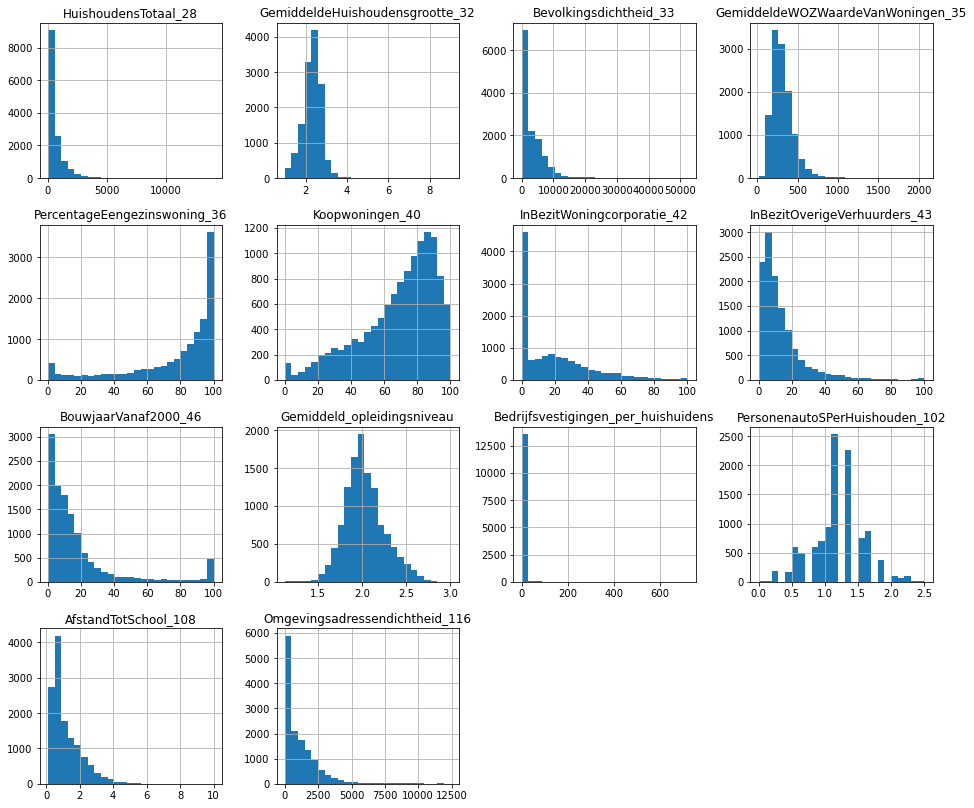

In [25]:
df.drop('Codering_3', axis = 1).hist(bins=25, figsize=(16,14));

### Explore correlations between average energy consumption and other features

Let's explore correlations between features. We will use correlation matrix with Pearson correlation coefficients. The most interesting for our subject is the average consumption of electricity, so the features will be ordered by decreasing correlation with `GemiddeldElektriciteitsverbruikTotaal_47`. 
Note: The dataset contains as well electricity and gas consumption data calculated separately per type of dwellings: Appartement, Tussenwoning, Hoekwoning, Twee-onder-één-kap-woning, Vrijstaande woning, as well as per ownership: Huurwoning and Eigen woning. These differences can be looked into at a later stage.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13808 entries, 3 to 17340
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   WijkenEnBuurten                      13808 non-null  object 
 1   Gemeentenaam_1                       13808 non-null  object 
 2   SoortRegio_2                         13808 non-null  object 
 3   Codering_3                           13808 non-null  int32  
 4   MeestVoorkomendePostcode_113         13808 non-null  object 
 5   HuishoudensTotaal_28                 13808 non-null  int64  
 6   GemiddeldeHuishoudensgrootte_32      13462 non-null  float64
 7   Bevolkingsdichtheid_33               13145 non-null  float64
 8   GemiddeldeWOZWaardeVanWoningen_35    11961 non-null  float64
 9   PercentageEengezinswoning_36         12271 non-null  float64
 10  Koopwoningen_40                      12265 non-null  float64
 11  InBezitWoningcorporatie_42  

In [27]:
# corr_matrix = df.corr().sort_values(by = 'GemiddeldElektriciteitsverbruikTotaal_47', ascending = False).transpose()
# corr_matrix = corr_matrix.sort_values(by = 'GemiddeldElektriciteitsverbruikTotaal_47', ascending = False)

In [28]:
# plt.figure(figsize = (14,11))
# sns.heatmap(data = corr_matrix, annot = True, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=True, vmax=1, center = 0)

Let's focus on the correlation between average electricity consumption and other features. High positive / negative values mean strong positive / negative linear correlation, values close to 0 indicate a weak or non-linear correlation. 

In [29]:
# plt.figure(figsize = (10,10))
# sns.heatmap(data = corr_matrix[['GemiddeldElektriciteitsverbruikTotaal_47']], 
            # annot = True, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=True, vmax=1, center = 0)

Finally, let's visualize correlations between each individual numeric feature (on x axes) and average electricity consumption (y axis of each diagram)

In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics).drop('Codering_3', axis = 1)

In [31]:
# after the notebook Pima Indians Diabetes © 2020 by Laurence Frank and Daniel Kapitan. 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html 
# fig, ax = plt.subplots(5, 4, figsize=(15,15), sharey=True, gridspec_kw={'hspace': 0.3})
# print('num columns', df_num.columns)
# for i, col in enumerate(df_num.columns):
#     # print(i//4, i%4)
#     _ax=ax[i // 4, i % 4]
#     sns.scatterplot(x=col, y='GemiddeldElektriciteitsverbruikTotaal_47', data=df_num, ax=_ax)

Finally, we write the dataset to a csv file, so that it can be used as input file in next stages of analysis.

In [32]:
# test to see if it works
# dg = df.loc[:,['WijkenEnBuurten','Codering_3','HuishoudensTotaal_28']]
# dg.to_csv(path_or_buf = 'test_CBS_dataset_' + selected_dataset + '.csv', index = False)

In [33]:
df.to_csv(path_or_buf = 'CBS_dataset_' + selected_dataset + '.csv', decimal=',', sep=';', index = False)

PermissionError: [Errno 13] Permission denied: 'CBS_dataset_84799NED.csv'

In [ ]:
#nbconvert.PDFExporter('Enexis CBS data EDA v1')